**Grupo 12: Estudio exploratorio: Análisis de Correspondencia Múltiple y de Cluster aplicado a las importaciones argentinas en el año 2017**

---

Álvarez Eugenia, Laguna Nicolás, Mosconi Florencia, Quispe Santiago

In [ ]:
import numpy as np                          # analisis numérico 
import pandas as pd                         # manejo de datos
import matplotlib.pyplot as plt             # gráficos básicos
import seaborn as sns                       # gráficos más avanzados
import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
Base = pd.read_csv("/content/drive/MyDrive/DIPLOMATURA GRUPO 12/BASE/BDs_empleo_impo.csv")
Base.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id_anonimo,year,credito,credito_garantia,situacion_deuda,clae,cpa,codprov,empleo_medio,salario,...,dest,destinac,item,posic_sim,ident_decl,cant_decl,cant_unest,fob,kilos,cif
0,41410048,2017.0,4.3,0.0,1.0,952100.0,5000.0,14.0,13.166667,18597.091797,...,IC04,IMPORTACION A CONSUMO CON DOCUMENTO DE TRANSPORTE,3,84799090,17001IC04207724R,5.0,314.7800,634.29999,314.7800,668.79999
1,70215616,2017.0,523.9,0.0,1.0,475430.0,1017.0,2.0,3.181818,25316.400391,...,IC04,IMPORTACION A CONSUMO CON DOCUMENTO DE TRANSPORTE,3,85371090,17073IC04186644K,3.0,5.5000,1308.37000,5.5000,1439.54000
2,20499396,2017.0,679.3,0.0,1.0,NaN,NaN,NaN,1.000000,7043.158203,...,IC04,IMPORTACION A CONSUMO CON DOCUMENTO DE TRANSPORTE,1,85119000,17001IC04224115K,2250.0,4632.0000,24045.50000,4632.0000,24325.55100
3,68641776,2017.0,85.8,0.0,1.0,464330.0,1416.0,2.0,8.000000,19239.949219,...,IC04,IMPORTACION A CONSUMO CON DOCUMENTO DE TRANSPORTE,1,40151100,17001IC04211638Z,197400.0,5668.3198,33558.00000,5668.3198,35516.53100
4,59866576,2017.0,14.4,0.0,1.0,275099.0,1427.0,2.0,4.000000,14683.958008,...,IC04,IMPORTACION A CONSUMO CON DOCUMENTO DE TRANSPORTE,1,85171810,17001IC04221624M,300.0,300.0000,11700.00000,280.0000,11965.67000


# **Variables**

In [ ]:
print(Base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436439 entries, 0 to 436438
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_anonimo        436439 non-null  int64  
 1   year              432262 non-null  float64
 2   credito           419981 non-null  float64
 3   credito_garantia  419981 non-null  float64
 4   situacion_deuda   419981 non-null  float64
 5   clae              430001 non-null  float64
 6   cpa               430001 non-null  float64
 7   codprov           430001 non-null  float64
 8   empleo_medio      432262 non-null  float64
 9   salario           432262 non-null  float64
 10  est               436439 non-null  int64  
 11  estado            436439 non-null  object 
 12  medio_tra         436439 non-null  object 
 13  umed_decl         436439 non-null  object 
 14  umed_estad        436439 non-null  object 
 15  origen            436439 non-null  object 
 16  aduana            43

In [ ]:
Base.shape

(436439, 28)

In [ ]:
Base.describe()

,id_anonimo,year,credito,credito_garantia,situacion_deuda,clae,cpa,codprov,empleo_medio,salario,est,item,posic_sim,cant_decl,cant_unest,fob,kilos,cif
count,4.364390e+05,432262.0,4.199810e+05,4.199810e+05,419981.000000,430001.000000,430001.000000,430001.000000,432262.000000,432262.000000,436439.000000,436439.000000,4.364390e+05,4.364390e+05,4.364390e+05,4.364390e+05,4.364390e+05,4.364390e+05
mean,4.998674e+07,2017.0,4.044375e+05,1.671459e+04,1.015105,346598.636375,2308.250988,16.622161,1189.889791,50990.771366,2.015555,26.983755,7.163362e+07,8.137301e+03,7.671653e+03,1.359557e+04,7.367012e+03,1.425679e+04
std,4.626753e+06,0.0,8.994220e+05,1.755268e+05,0.297817,128229.164409,1973.327116,28.053499,2127.352824,21738.077464,0.191118,46.089164,2.118744e+07,2.094042e+05,3.006991e+05,1.916884e+05,2.993274e+05,1.996826e+05
min,8.472600e+04,2017.0,0.000000e+00,0.000000e+00,1.000000,11.000000,1001.000000,2.000000,1.000000,0.010000,1.000000,1.000000,1.012100e+06,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,1.000000e-02
25%,4.921201e+07,2017.0,1.460500e+03,0.000000e+00,1.000000,281100.000000,1416.000000,2.000000,54.000000,35499.000000,2.000000,2.000000,6.105100e+07,4.000000e+00,1.810000e+00,1.198150e+02,1.740000e+00,1.295350e+02
50%,5.001185e+07,2017.0,3.804020e+04,0.000000e+00,1.000000,291000.000000,1629.000000,6.000000,351.083333,51550.410156,2.000000,9.000000,8.421991e+07,3.000000e+01,1.556000e+01,7.706400e+02,1.927000e+01,8.225400e+02
75%,5.064145e+07,2017.0,3.075481e+05,0.000000e+00,1.000000,465100.000000,2152.000000,6.000000,1422.916667,60760.441406,2.000000,30.000000,8.536909e+07,5.400000e+02,2.520000e+02,5.007430e+03,2.956450e+02,5.319470e+03
max,9.997694e+07,2017.0,1.393059e+07,2.534450e+06,11.000000,990000.000000,9420.000000,94.000000,129934.500000,308594.500000,6.000000,468.000000,9.703000e+07,6.250000e+07,5.942861e+07,8.352870e+07,5.942861e+07,8.700000e+07


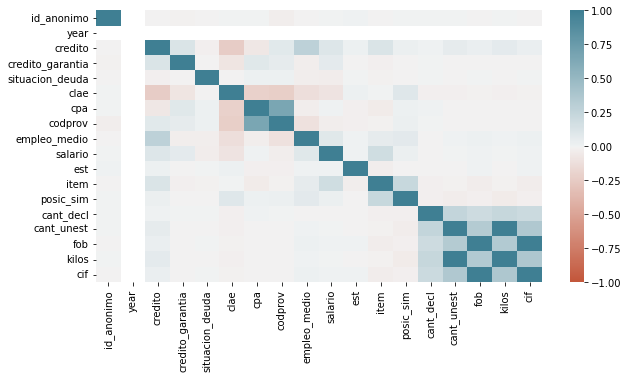

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(Base.corr(), cmap=sns.diverging_palette(20, 220, n=256),
            vmin=-1, vmax=1, center=0)

# **Análisis variable: Year**

In [ ]:
Base.year.unique()

array([2017.,   nan])

Se elimina year por valor único

# **Análisis variables: dest y destinac**

In [ ]:
Base_Dest = Base[["dest", "destinac"]]
Base["destino"] = Base_Dest["dest"] + Base_Dest["destinac"]

In [ ]:
Base.destino.nunique()

41

# **Análisis variables: umed_estad, umed_decl**

In [ ]:
Base.umed_estad.nunique()

10

In [ ]:
Base.umed_estad.unique()

array(['Kilogramo', 'Unidad', 'Par', 'Metro Cubico', 'Metro Cuadrado',
       'Millar', 'Litros', 'Jgo.Pqt.Mazo Naipes', '1000 Kilowatt Hora',
       'Metros'], dtype=object)

In [ ]:
Base.umed_decl.nunique()

29

In [ ]:
Base.umed_decl.unique()

array(['Unidad', 'Par', 'Millar', 'Metros', 'Tonelada', 'Kilogramo',
       'Metro Cuadrado', 'Metro Cubico', 'Docena', 'Kg.Bruto', 'Litros',
       'M.U.Inter.Act.Antico', 'Gramo', 'Miligramo', 'Centimetro',
       'Gruesa', 'Mililitro', 'Jgo.Pqt.Mazo Naipes', 'Curie',
       'Hectolitro', '1000 Kilowatt Hora', 'MegaU.Inter.Act.Inmg',
       'Kilometro', 'Kilogramo Base', 'Milimetro', 'Mega U.Inter.Act.Hor',
       'Gramo Activo', 'Milicurie', 'Quilate'], dtype=object)

Elegimos quedarnos con kilos, porque es una variable comparable entre unidades


# **Analisis variable: medio_tra**

In [ ]:
Base.medio_tra.unique()

array(['Acuatica', 'Avion', 'No Determinado', 'Camion', 'Via Postal',
       'Propios Medios', 'Ferrocarril', 'Conductor Electrico',
       'Oleoducto/Gasoducto'], dtype=object)

In [ ]:
Base_Medio_Transporte = Base.groupby(['medio_tra']).count()['ident_decl']    #.sort_values(ascending=False)[0:25]

In [ ]:
Base_Medio_Transporte

medio_tra
Acuatica               153880
Avion                  115658
Camion                 154022
Conductor Electrico         5
Ferrocarril                 4
No Determinado          12688
Oleoducto/Gasoducto         1
Propios Medios             77
Via Postal                104
Name: ident_decl, dtype: int64

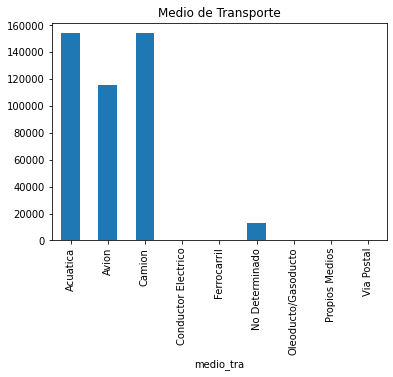

In [ ]:
Base_Medio_Transporte.plot(kind='bar', title='Medio de Transporte')

# **Análisis variables: codprov, cpa**

In [ ]:
Base.codprov.unique()

array([14.,  2., nan,  6., 22., 30., 82., 54., 90., 70., 50., 34., 66.,
       18., 62., 94., 58., 38., 42., 86., 74., 26., 46., 10., 78.])

In [ ]:
print(Base.codprov.isnull().sum())

6438


In [ ]:
Base.cpa.nunique()

828

In [ ]:
Base_Cod_Prov = Base.loc[Base.codprov == 78.0]
Base_Cod_Prov.cpa.unique()

array([9400., 9311.])

In [ ]:
#Cod_Provincias = pd.read_excel("Provincia_Por_Codigo.xlsx")

In [ ]:
Cod_Provincias = pd.read_excel("/content/drive/MyDrive/DIPLOMATURA GRUPO 12/BASE/Provincia_Por_Codigo.xlsx")
Cod_Provincias = Cod_Provincias.drop_duplicates('codigo_provincia')
Cod_Provincias = Cod_Provincias[["codigo_provincia","provincia"]]
Base_Cod_Prov = pd.merge(left=Base,right=Cod_Provincias, left_on=["codprov"], right_on=['codigo_provincia'])

In [ ]:
Base_Cod_Prov.columns

Index(['id_anonimo', 'year', 'credito', 'credito_garantia', 'situacion_deuda',
       'clae', 'cpa', 'codprov', 'empleo_medio', 'salario', 'est', 'estado',
       'medio_tra', 'umed_decl', 'umed_estad', 'origen', 'aduana', 'procedenc',
       'dest', 'destinac', 'item', 'posic_sim', 'ident_decl', 'cant_decl',
       'cant_unest', 'fob', 'kilos', 'cif', 'destino', 'codigo_provincia',
       'provincia'],
      dtype='object')

In [ ]:
Base_Cod_Prov.groupby('provincia').count()

,id_anonimo,year,credito,credito_garantia,situacion_deuda,clae,cpa,codprov,empleo_medio,salario,...,item,posic_sim,ident_decl,cant_decl,cant_unest,fob,kilos,cif,destino,codigo_provincia
provincia,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,192119,192087,187741,187741,187741,192119,192119,192119,192087,192087,...,192119,192119,192119,192119,192119,192119,192119,192119,192119,192119
Catamarca,369,369,327,327,327,369,369,369,369,369,...,369,369,369,369,369,369,369,369,369,369
Chaco,359,359,357,357,357,359,359,359,359,359,...,359,359,359,359,359,359,359,359,359,359
Chubut,135,135,133,133,133,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
Ciudad Autónoma de Buenos Aires,148141,148035,142578,142578,142578,148141,148141,148141,148035,148035,...,148141,148141,148141,148141,148141,148141,148141,148141,148141,148141
Corrientes,533,533,520,520,520,533,533,533,533,533,...,533,533,533,533,533,533,533,533,533,533
Córdoba,21392,21369,21091,21091,21091,21392,21392,21392,21369,21369,...,21392,21392,21392,21392,21392,21392,21392,21392,21392,21392
Entre Ríos,414,412,410,410,410,414,414,414,412,412,...,414,414,414,414,414,414,414,414,414,414
Formosa,41,37,21,21,21,41,41,41,37,37,...,41,41,41,41,41,41,41,41,41,41


In [ ]:
Base['provincia_destino'] = Base_Cod_Prov.provincia

In [ ]:
Base.columns

Index(['id_anonimo', 'year', 'credito', 'credito_garantia', 'situacion_deuda',
       'clae', 'cpa', 'codprov', 'empleo_medio', 'salario', 'est', 'estado',
       'medio_tra', 'umed_decl', 'umed_estad', 'origen', 'aduana', 'procedenc',
       'dest', 'destinac', 'item', 'posic_sim', 'ident_decl', 'cant_decl',
       'cant_unest', 'fob', 'kilos', 'cif', 'destino', 'provincia_destino'],
      dtype='object')

*Analizar cambiar de variable,eliminar codprov o reemplazar*

# **Análisis variables: aduana, origen, procedencia**

In [ ]:
Base.aduana.unique()

array(['BS.AS.(CAPITAL)', 'EZEIZA', 'CORDOBA', 'LA PLATA',
       'Z.F. CORONEL ROSALES', 'ROSARIO', 'PASO DE LOS LIBRES',
       'BERNARDO DE YRIGOYEN', 'MENDOZA', 'SALTA', 'CLORINDA',
       'SAN JAVIER', 'GENERAL DEHEZA', 'SANTA FE', 'CONCORDIA',
       'CONCEPCION DEL URUGU', 'POCITOS', 'USHUAIA', 'POSADAS',
       'MAR DEL PLATA', 'BARILOCHE', 'RIO GRANDE', 'SANTO TOME',
       'RAFAELA', 'ORAN', 'VILLA CONSTITUCION', 'JUJUY', 'TUCUMAN',
       'BAHIA BLANCA', 'IGUAZU', 'SAN LORENZO', 'CAMPANA', 'SAN JUAN',
       'NEUQUEN', 'PARANA', 'SAN NICOLAS', 'COLON', 'GUALEGUAYCHU',
       'DIAMANTE', 'SAN RAFAEL', 'SAN LUIS', 'PUERTO MADRYN',
       'COMODORO RIVADAVIA', 'VILLA REGINA', 'CORRIENTES',
       'PUERTO DESEADO', 'LA RIOJA', 'NECOCHEA', 'GENERAL PICO',
       'LA QUIACA', 'BARRANQUERAS', 'S.MARTIN DE LOS ANDE', 'TINOGASTA',
       'CALETA OLIVIA', 'FORMOSA'], dtype=object)

In [ ]:
Base.procedenc.unique()

array(['China', 'Estados Unidos', 'Alemania', 'India', 'Turquia',
       'Uruguay', 'Taiwan', 'Italia', 'EspaÃ¯Â¿Â½a', 'Brasil', 'Paraguay',
       'Peru', 'Belgica', 'Colombia', 'Corea, Republica de', 'Indonesia',
       'Reino Unido', 'Chile', 'Polonia', 'Francia', 'Hong Kong',
       'Dinamarca', 'Austria', 'Canada', 'Bolivia', 'Australia',
       'Paises Bajos', 'Japon', 'Ecuador', 'ZF Colon (Panama)', 'Suiza',
       'Paquistan', 'Vietnam', 'Tailandia', 'Letonia',
       'ZF Iquique (Chile)', 'Mexico', 'Israel', 'Malasia', 'Filipinas',
       'Nueva Zelandia', 'Portugal', 'Suecia', 'Irlanda',
       'Republica Dominicana', 'Eslovenia', 'ZF Nueva Palmira (Uruguay)',
       'Finlandia', 'Singapur', 'Hungria', 'ZF CÃ¯Â¿Â½rdoba (Argentina)',
       'Corea, Rep Popular Democratica de', 'ZF Manaos (Brasil)',
       'Panama', 'Rusia', 'ZF La Plata (Argentina)',
       'ZF Zonamerica (Ex Montevideo-Uruguay)', 'ZF Colonia (Uruguay)',
       'ZF Florida (Uruguay)', 'Bangladesh', 'Noruega', 

In [ ]:
Base.origen.unique()

array(['China', 'Estados Unidos', 'Austria', 'India', 'Turquia',
       'Uruguay', 'Taiwan', 'Italia', 'Alemania', 'EspaÃ¯Â¿Â½a', 'Brasil',
       'Eslovaquia', 'Paraguay', 'Peru', 'Suiza', 'Colombia',
       'Corea, Republica de', 'Republica Checa', 'Indonesia', 'Francia',
       'Reino Unido', 'Chile', 'Argentina', 'Ucrania', 'Dinamarca',
       'Canada', 'Belgica', 'Bolivia', 'Australia', 'Paises Bajos',
       'Polonia', 'Japon', 'Hong Kong', 'Ecuador', 'Singapur',
       'Paquistan', 'Vietnam', 'Tailandia', 'Mexico', 'Israel', 'Malasia',
       'Suecia', 'Portugal', 'Irlanda', 'Finlandia', 'Nueva Zelandia',
       'Republica Dominicana', 'Eslovenia', 'Puerto Rico', 'Hungria',
       'Luxemburgo', 'ZF Rio Negro (Uruguay)',
       'Corea, Rep Popular Democratica de', 'ZF Manaos (Brasil)', 'Rusia',
       'Filipinas', 'Sudafrica', 'ZF Colonia (Uruguay)', 'Bangladesh',
       'Noruega', 'Guatemala', 'Uzbekistan', 'Marruecos', 'Tunez',
       'Trinidad y Tobago', 'Qatar', 'Croacia', 'M

In [ ]:
#Paises_Continentes = pd.read_excel("Paises_Por_Continentes.xlsx")

In [ ]:
Paises_Continentes = pd.read_excel("/content/drive/MyDrive/DIPLOMATURA GRUPO 12/BASE/Paises_Por_Continentes.xlsx")
Paises_Continentes = Paises_Continentes[["region","pais"]]
Base = pd.merge(left=Base,right=Paises_Continentes, left_on=["procedenc"], right_on=['pais'])

In [ ]:
Base_Continentes = Base.groupby('region')['id_anonimo'].count().sort_values(ascending=False)[0:25]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2bb205bd0>],
      dtype=object)

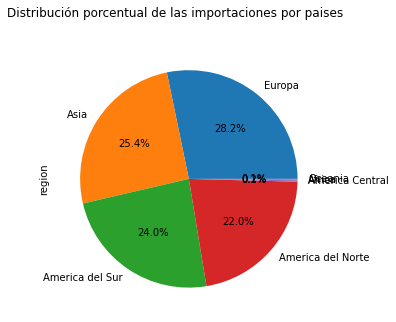

In [ ]:
Base_Continentes_Plt = Base.region.value_counts()
Base_Continentes_Plt.plot.pie(autopct='%1.1f%%',subplots=True, figsize=(15, 5), title='Distribución porcentual de las importaciones por paises')

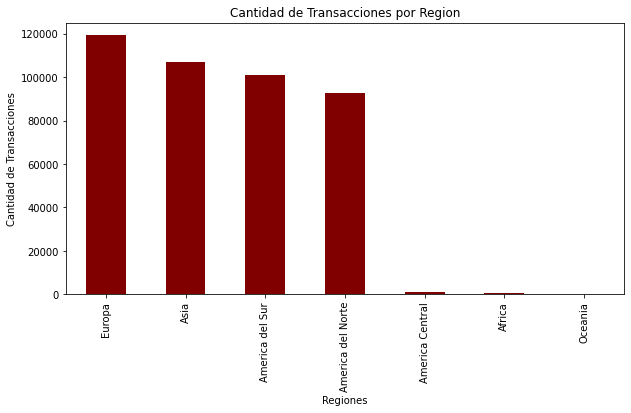

In [ ]:
Base_Continentes.plot.bar(figsize = (10, 5), color ='maroon')
plt.title("Cantidad de Transacciones por Region")
plt.xlabel("Regiones")
plt.ylabel("Cantidad de Transacciones")
plt.show()

# **Análisis variable: posic_sim**

In [ ]:
Base.posic_sim.nunique()

5913

In [ ]:
Base.posic_sim.unique()

array([84799090, 85119000, 85171810, ...,  3038942,  3038990, 57024200])

In [ ]:
#Posic_Sim = pd.read_excel("Posic_Sim.xlsx")

In [ ]:
Posic_Sim = pd.read_excel("/content/drive/MyDrive/DIPLOMATURA GRUPO 12/BASE/Posic_Sim.xlsx")
Posic_Sim = Posic_Sim[["NCM","DESCRIPCIÓN"]]
Base_Sim = pd.merge(left=Base,right=Posic_Sim, left_on=["posic_sim"], right_on=['NCM'])

In [ ]:
Base['NCM'] = Base_Sim.NCM
Base['DESCRIPCIÓN'] = Base_Sim.DESCRIPCIÓN

# **Análisis variable: peso**

In [ ]:
Base.kilos.nunique()

79299

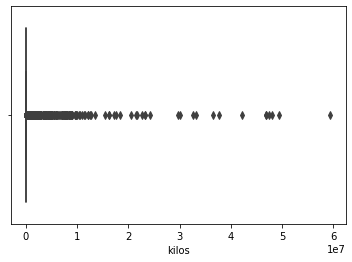

In [ ]:
sns.boxplot(x=Base['kilos'])

**Separamos en Quantiles** 


In [ ]:
Base_Peso = Base

In [ ]:
Base_Peso['quantil'] = pd.qcut(Base['kilos'],
                               q = 10, labels = False) 
Base_Peso = Base_Peso.groupby('quantil')['kilos'].mean().sort_values(ascending=False)[0:25]
Base_Peso

quantil
9    64297.194656
8     1413.961719
7      312.910058
6       94.210984
5       32.425695
4       12.172748
3        4.742226
2        1.806897
1        0.597401
0        0.099373
Name: kilos, dtype: float64

**Separamos el Peso en Categorias**

In [ ]:
condition = [
          (Base['kilos'] <= 1),
          (Base['kilos'] > 1.)&(Base['kilos'] <= 5),
          (Base['kilos'] > 5.)&(Base['kilos'] <= 35),
          (Base['kilos'] > 35.)&(Base['kilos'] <= 350),
          (Base['kilos'] > 350.),

]
opciones = ['muy liviano','liviano','mediano','pesado','muy pesado']
Base['peso'] = np.select(condition, opciones)


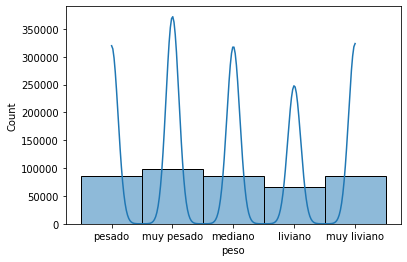

In [ ]:
sns.histplot(Base['peso'], bins=30, kde=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2b9427350>],
      dtype=object)

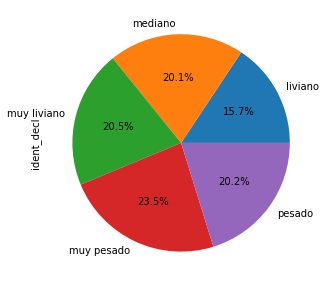

In [ ]:
Base_Peso_Plt = Base.groupby(['peso']).count()['ident_decl']    
Base_Peso_Plt.plot.pie(autopct='%1.1f%%',subplots=True, figsize=(15, 5), title='')

# **Analisis de Variable: cif**

In [ ]:
Base.cif.nunique()

242441

# **Unión con nomenclatura de AFIP**

Nomenclador de actividades económicas según AFIP


In [ ]:
#Clae_AFIP = pd.read_csv("Clae_Nomenclatura_AFIP.csv")

In [ ]:
Clae_AFIP = pd.read_csv("/content/drive/MyDrive//DIPLOMATURA GRUPO 12/BASE/Clae_Nomenclatura_AFIP.csv")


Unimos las tablas coincidiendo el Clae 6, categoría más específica

In [ ]:
Base_CLAE = pd.merge(left=Base,right=Clae_AFIP, left_on=["clae"], right_on=['clae6'])

In [ ]:
Base_CLAE.groupby('clae2_desc').count()

,id_anonimo,year,credito,credito_garantia,situacion_deuda,clae,cpa,codprov,empleo_medio,salario,...,DESCRIPCIÓN,quantil,peso,clae6,clae6_desc,clae3,clae3_desc,clae2,letra,letra_desc
clae2_desc,,,,,,,,,,,,,,,,,,,,,
Actividades administrativas y de apoyo a oficinas y empresas,1651,1651,710,710,710,1651,1651,1651,1651,1651,...,1628,1651,1651,1651,1651,1651,1651,1651,1651,1651
Actividades de apoyo al petróleo y la minería,4935,4935,4517,4517,4517,4935,4935,4935,4935,4935,...,4910,4935,4935,4935,4935,4935,4935,4935,4935,4935
Actividades de investigación y seguridad,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
Actividades de procesamiento de información,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
"Actividades deportivas, recreativas y de entretenimiento",35,35,18,18,18,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Suministro de electricidad, gas, vapor y aire acondicionado",2307,2307,2256,2256,2256,2307,2307,2307,2307,2307,...,2262,2307,2307,2307,2307,2307,2307,2307,2307,2307
Telecomunicaciones,658,658,635,635,635,658,658,658,658,658,...,649,658,658,658,658,658,658,658,658,658
Transporte acuático,195,195,195,195,195,195,195,195,195,195,...,187,195,195,195,195,195,195,195,195,195


In [ ]:
Base_CLAE.groupby('letra_desc').count()

,id_anonimo,year,credito,credito_garantia,situacion_deuda,clae,cpa,codprov,empleo_medio,salario,...,DESCRIPCIÓN,quantil,peso,clae6,clae6_desc,clae3,clae3_desc,clae2,clae2_desc,letra
letra_desc,,,,,,,,,,,,,,,,,,,,,
ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS DE APOYO,2487,2487,1508,1508,1508,2487,2487,2487,2487,2487,...,2407,2487,2487,2487,2487,2487,2487,2487,2487,2487
"ADMINISTRACION PUBLICA, DEFENSA Y SEGURIDAD SOCIAL OBLIGATORIA",196,196,129,129,129,196,196,196,196,196,...,194,196,196,196,196,196,196,196,196,196
"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y PESCA",1364,1364,1229,1229,1229,1364,1364,1364,1364,1364,...,1347,1364,1364,1364,1364,1364,1364,1364,1364,1364
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS,154644,154504,149297,149297,149297,154644,154644,154644,154504,154504,...,150220,154644,154644,154644,154644,154644,154644,154644,154644,154644
CONSTRUCCIÓN,1951,1950,1908,1908,1908,1951,1951,1951,1950,1950,...,1924,1951,1951,1951,1951,1951,1951,1951,1951,1951
ENSEÑANZA,43,43,41,41,41,43,43,43,43,43,...,39,43,43,43,43,43,43,43,43,43
INDUSTRIA MANUFACTURERA,236717,236701,233494,233494,233494,236717,236717,236717,236701,236701,...,231539,236717,236717,236717,236717,236717,236717,236717,236717,236717
INFORMACIÓN Y COMUNICACIONES,2190,2185,2120,2120,2120,2190,2190,2190,2185,2185,...,2064,2190,2190,2190,2190,2190,2190,2190,2190,2190
INTERMEDIACIÓN FINANCIERA Y SERVICIOS DE SEGUROS,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229


Elegimos el Clae_2 y el letra_desc, como dos variables descriptivas, la última más amplia.

In [ ]:
Base['actividad'] = Base_CLAE.clae2_desc
Base['rama'] = Base_CLAE.letra_desc

In [ ]:
Base.shape

(422104, 38)

In [ ]:
Base['transaccion'] = Base.index

# **Eliminación de Variables**

**Eliminamos variables que decidimos no incluir dado el problema que elegimos**

In [ ]:
Base.columns

Index(['id_anonimo', 'year', 'credito', 'credito_garantia', 'situacion_deuda',
       'clae', 'cpa', 'codprov', 'empleo_medio', 'salario', 'est', 'estado',
       'medio_tra', 'umed_decl', 'umed_estad', 'origen', 'aduana', 'procedenc',
       'dest', 'destinac', 'item', 'posic_sim', 'ident_decl', 'cant_decl',
       'cant_unest', 'fob', 'kilos', 'cif', 'destino', 'provincia_destino',
       'region', 'pais', 'NCM', 'DESCRIPCIÓN', 'quantil', 'peso', 'actividad',
       'rama', 'transaccion'],
      dtype='object')

In [ ]:
Base_Def = Base.copy()

In [ ]:
Base_Def = Base_Def.drop(['year',
                   'credito',
                   'credito_garantia',
                   'situacion_deuda',
                   'estado',
                   'clae',
                   'item',
                   'ident_decl',
                   'dest',
                   'destinac',
                   'umed_decl',
                   'umed_estad',
                   'origen',
                   'NCM',
                   ], axis=1) 

In [ ]:
Base_Def.columns

Index(['id_anonimo', 'cpa', 'codprov', 'empleo_medio', 'salario', 'est',
       'medio_tra', 'aduana', 'procedenc', 'posic_sim', 'cant_decl',
       'cant_unest', 'fob', 'kilos', 'cif', 'destino', 'provincia_destino',
       'region', 'pais', 'DESCRIPCIÓN', 'quantil', 'peso', 'actividad', 'rama',
       'transaccion'],
      dtype='object')

In [ ]:
Base_Def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422104 entries, 0 to 422103
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_anonimo         422104 non-null  int64  
 1   cpa                415849 non-null  float64
 2   codprov            415849 non-null  float64
 3   empleo_medio       418010 non-null  float64
 4   salario            418010 non-null  float64
 5   est                422104 non-null  int64  
 6   medio_tra          422104 non-null  object 
 7   aduana             422104 non-null  object 
 8   procedenc          422104 non-null  object 
 9   posic_sim          422104 non-null  int64  
 10  cant_decl          422104 non-null  float64
 11  cant_unest         422104 non-null  float64
 12  fob                422104 non-null  float64
 13  kilos              422104 non-null  float64
 14  cif                422104 non-null  float64
 15  destino            422104 non-null  object 
 16  pr

# **Corrección de Base**

Reemplazamos correctamente los nombres "España" y "Haití" para evitar problemas futuros.

Nos quedamos con procedencia, ya que no nos interesa para este análisis dónde se hizo el producto, sino de donde se importó.

In [ ]:
Base_Def.loc[Base_Def.procedenc=='EspaÃ¯Â¿Â½a', 'origen'] = 'España'
Base_Def.loc[Base_Def.procedenc=='HaitÃ¯Â¿Â½', 'origen'] = 'Haiti'
Base_Def.loc[Base_Def.procedenc=='ZF CÃ¯Â¿Â½rdoba (Argentina)', 'origen'] = 'ZF Córdoba (Argentina)'

# **Ordenamos las variables por tipo**

In [ ]:
Base_Def = Base_Def [['transaccion', 'id_anonimo', 'rama', 'actividad', 'provincia_destino', 'procedenc',  'region', 'medio_tra','aduana', 'peso', 'cif', 'empleo_medio', 'salario']]

# **Tratamiento de valores nulos**



In [ ]:
print(Base_Def.isnull().sum())

transaccion             0
id_anonimo              0
rama                 6265
actividad            6265
provincia_destino    6062
procedenc               0
region                  0
medio_tra               0
aduana                  0
peso                    0
cif                     0
empleo_medio         4094
salario              4094
dtype: int64


Porcentaje que representan los valores nulos de la variable *ACTIVIDAD/RAMA* en la base

In [ ]:
Base_Def.actividad.isnull().sum()/(len(Base_Def.actividad))*100

1.4842313742584765

Porcentaje que representan los valores nulos de la variable *PROVINCIA DESTINO* en la base

In [ ]:
Base_Def.provincia_destino.isnull().sum()/(len(Base_Def.provincia_destino))*100

1.4361389610143471

Porcentaje que representan los valores nulos de la variable *EMPLEO MEDIO/SALARIO* en la base

In [ ]:
Base_Def.empleo_medio.isnull().sum()/(len(Base_Def.empleo_medio))*100

0.9699031518298808

No es significativo, ya que no supera el 5% del total de datos, decidimos descartarlos ya que es una variable categórica, no es posible reemplazar por una media o moda, y comprende los valores nulos de otras variables.

In [ ]:
Base_Def = Base_Def.dropna()

In [ ]:
Base_Def.shape

(405960, 13)

# **Construcción de categoría**

Opcion 1: Rama

In [ ]:
Base_Rama = Base_Def[['transaccion','rama']].copy()
Base_Rama.dropna(inplace= True)

In [ ]:
Rama = Base_Rama.groupby(by="rama").count()
Rama['FR'] = (Rama['transaccion']/Rama['transaccion'].sum())*100
Rama

,transaccion,FR
rama,,
ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS DE APOYO,2474,0.609420
"ADMINISTRACION PUBLICA, DEFENSA Y SEGURIDAD SOCIAL OBLIGATORIA",191,0.047049
"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y PESCA",1290,0.317765
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS,151946,37.428811
CONSTRUCCIÓN,1951,0.480589
ENSEÑANZA,43,0.010592
INDUSTRIA MANUFACTURERA,229728,56.588826
INFORMACIÓN Y COMUNICACIONES,2188,0.538969
INTERMEDIACIÓN FINANCIERA Y SERVICIOS DE SEGUROS,228,0.056163


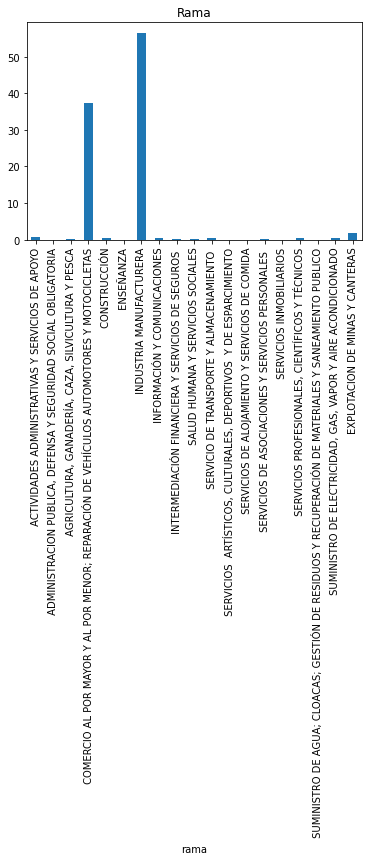

In [ ]:
plot = Rama['FR'].plot(kind='bar', title='Rama')

Descartamos Rama porque hay una categoría muy predominante

Opcion 2: Actividad

In [ ]:
Base_Actividad = Base_Def[['transaccion','actividad']].copy()
Base_Actividad

,transaccion,actividad
0,0,Reparación de computadoras y equipos de uso do...
1,1,Reparación de computadoras y equipos de uso do...
2,2,Reparación de computadoras y equipos de uso do...
3,3,Reparación de computadoras y equipos de uso do...
4,4,Reparación de computadoras y equipos de uso do...
...,...,...
415834,415834,Comercio al por mayor excepto autos y motos
415835,415835,Comercio al por mayor excepto autos y motos
415836,415836,Comercio al por mayor excepto autos y motos
415837,415837,Servicios jurídicos y de contabilidad


In [ ]:
Actividad = Base_Actividad.groupby(by="actividad").count()
Actividad

,transaccion
actividad,
Actividades administrativas y de apoyo a oficinas y empresas,1651
Actividades de apoyo al petróleo y la minería,4935
Actividades de investigación y seguridad,42
Actividades de procesamiento de información,20
"Actividades deportivas, recreativas y de entretenimiento",35
...,...
"Suministro de electricidad, gas, vapor y aire acondicionado",2307
Telecomunicaciones,658
Transporte acuático,195


In [ ]:
Actividad['FR'] = (Actividad['transaccion']/Actividad['transaccion'].sum())*100
Actividad

,transaccion,FR
actividad,,
Actividades administrativas y de apoyo a oficinas y empresas,1651,0.406690
Actividades de apoyo al petróleo y la minería,4935,1.215637
Actividades de investigación y seguridad,42,0.010346
Actividades de procesamiento de información,20,0.004927
"Actividades deportivas, recreativas y de entretenimiento",35,0.008622
...,...,...
"Suministro de electricidad, gas, vapor y aire acondicionado",2307,0.568283
Telecomunicaciones,658,0.162085
Transporte acuático,195,0.048034


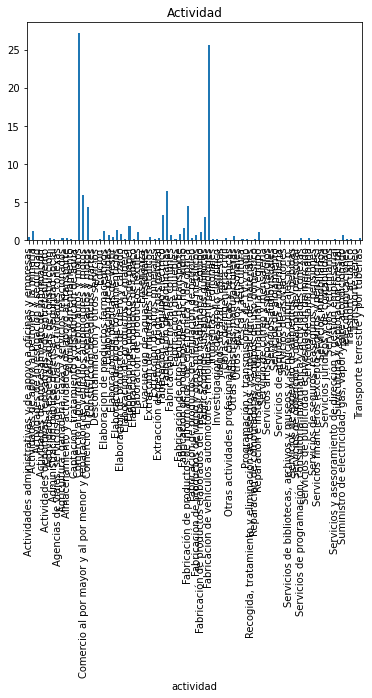

In [ ]:
plot = Actividad['FR'].plot(kind='bar', title='Actividad')

In [ ]:
Actividad.sort_values(by = 'FR',ascending=False, inplace=True)
Actividad.head(20)

,transaccion,FR
actividad,,
Comercio al por mayor excepto autos y motos,110503,27.220169
"Fabricación de vehículos automotores, remolques y semirremolques",103980,25.613361
Fabricación de maquinarias,26249,6.465908
Comercio al por mayor y al por menor y reparación de vehículos automotores y motos,23941,5.897379
"Fabricación de productos de informática, de electrónica y de óptica",17875,4.403143
Comercio al por menor excepto autos y motos,17502,4.311262
Fabricación de equipo eléctrico,13439,3.310425
Fabricación de sustancias químicas,11925,2.937482
Elaboración de productos de papel,7128,1.755838


Reagrupamos actividades para reducir el número de categorías y que la frecuencia de éstas este mejor distribuida.

In [ ]:
from pandas.io.excel import read_excel
Categorias = pd.read_excel("/content/drive/MyDrive/DIPLOMATURA GRUPO 12/BASE/Categorias.xlsx")

In [ ]:
Actividad_cat = pd.merge(left=Actividad,right=Categorias, left_on=["actividad"], right_on=['actividad'])

In [ ]:
Actividad_cat

,actividad,transaccion,FR,CATEGORÍA
0,Comercio al por mayor excepto autos y motos,110503,27.220169,Comercio al por mayor y menor excepto autos y ...
1,"Fabricación de vehículos automotores, remolque...",103980,25.613361,"Fabricación de vehículos automotores, remolque..."
2,Fabricación de maquinarias,26249,6.465908,Fabricación de otros equipos y productos
3,Comercio al por mayor y al por menor y reparac...,23941,5.897379,Comercio al por mayor y al por menor y reparac...
4,"Fabricación de productos de informática, de el...",17875,4.403143,Fabricación de otros equipos y productos
...,...,...,...,...
75,Evacuación de aguas residuales,2,0.000493,Otros
76,Servicio de correo y mensajería,2,0.000493,Servicios
77,"Servicios de seguros, reaseguros y pensiones",1,0.000246,Servicios
78,"Servicios de bibliotecas, archivos y museos y ...",1,0.000246,Servicios


In [ ]:
Actividad_cat.CATEGORÍA.nunique()

7

# **Tabla para ACM y Kmoda**

In [ ]:
Base_Def.columns

Index(['transaccion', 'id_anonimo', 'rama', 'actividad', 'provincia_destino',
       'procedenc', 'region', 'medio_tra', 'aduana', 'peso', 'cif',
       'empleo_medio', 'salario'],
      dtype='object')

In [ ]:
df_analisis = Base_Def[['transaccion', 'actividad', 'region','empleo_medio', 'salario','medio_tra', 'peso', 'cif','aduana']].copy()

In [ ]:
df_analisis = pd.merge(left=df_analisis,right=Categorias, left_on=["actividad"], right_on=['actividad'])

In [ ]:
df_analisis.tail(5)

,transaccion,actividad,region,empleo_medio,salario,medio_tra,peso,cif,aduana,CATEGORÍA
405955,415440,"Captación, tratamiento y distribución de agua",Europa,476.166667,65599.664062,Avion,muy liviano,137.77000,EZEIZA,Otros
405956,415441,"Captación, tratamiento y distribución de agua",Europa,476.166667,65599.664062,Avion,muy liviano,103.98000,EZEIZA,Otros
405957,415442,"Captación, tratamiento y distribución de agua",Europa,476.166667,65599.664062,Avion,mediano,4671.60010,EZEIZA,Otros
405958,415443,"Captación, tratamiento y distribución de agua",Europa,476.166667,65599.664062,Avion,liviano,436.70001,EZEIZA,Otros
405959,415810,"Servicios de seguros, reaseguros y pensiones",Europa,114.333333,91985.820312,Acuatica,mediano,925.21997,BS.AS.(CAPITAL),Servicios


In [ ]:
df_analisis = df_analisis.rename(columns={'CATEGORÍA':'categoria',})

# **Muestra tomada para los análisis**

A raíz de que tomar la base de datos total genera un gran uso de memoria y tiempo en la ejecución de los códigos y visualmente es complejo de observar y analizar, decidimos tomar una muestra del 25% del total.

In [ ]:
Df_sample = df_analisis.sample(n=101490, random_state=1)
Df_sample = Df_sample[['peso', 'medio_tra', 'region', 'categoria','aduana']]
Df_sample.shape

(101490, 5)

# **Destino de las importaciones**

In [ ]:
import folium
!pip install folium --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importamos aduanas y sus coordenadas geográficas**

In [ ]:
aduana = pd.read_csv("/content/drive/MyDrive/DIPLOMATURA GRUPO 12/BASE/aduana.csv", sep = ';', encoding='cp1252')

**Adecuamos los datos de coordenadas con el formato utilizado en la librería folium**

In [ ]:
import re
def coord(c):
    coor = re.findall(r'-?\d+\.\d{7}', c)
    coords = [float(s) for s in coor]
    return coords[::-1]

aduana['coord'] = aduana['coord'].apply(str)
aduana['coord'] = aduana['coord'].apply(coord)

**Creamos el mapa donde vamos a ubicar las diferentes aduanas**

In [ ]:
map= folium.Map(location=[-39.0000000, -67.0000000], zoom_start=5)

**Realizamos la colocación de cada aduana en su respectiva ubicación**

In [ ]:
for index, row in aduana.iterrows():
  folium.Marker(row['coord'], popup=row['aduana']).add_to(map)
map

In [ ]:
aduana_fr = Df_sample[['aduana']].copy()
aduana_fr['transaccion'] = aduana_fr.index
aduana_fr = aduana_fr.groupby(by = 'aduana').count()
aduana_fr['FR'] = (aduana_fr['transaccion']/aduana_fr['transaccion'].sum())*100
aduana_fr.sort_values(by = 'FR',ascending=False, inplace=True)
aduana_fr

,transaccion,FR
aduana,,
BS.AS.(CAPITAL),43101,42.468223
EZEIZA,25594,25.218248
CORDOBA,7538,7.427333
CAMPANA,6888,6.786876
ROSARIO,5273,5.195586
RIO GRANDE,4619,4.551187
PASO DE LOS LIBRES,2143,2.111538
USHUAIA,1575,1.551877
SANTO TOME,1562,1.539068


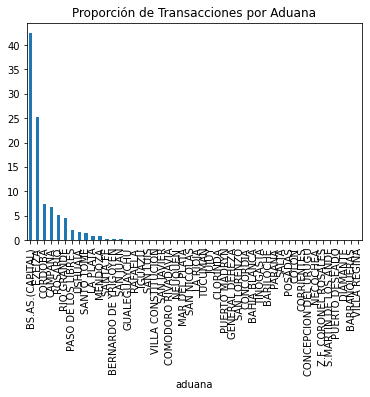

In [ ]:
plot = aduana_fr['FR'].plot(kind='bar', title='Proporción de Transacciones por Aduana')

#**ACM**

In [ ]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mca
import prince

**Elegimos las variables categóricas a analizar**

In [ ]:
Df_MCA_Plt = Df_sample[['peso', 'medio_tra', 'region']]
 
mca = prince.MCA()
mca.fit(Df_MCA_Plt)

MCA()

**Graficamos los resultados obtenidos del análisis de corespondencia múltiple**

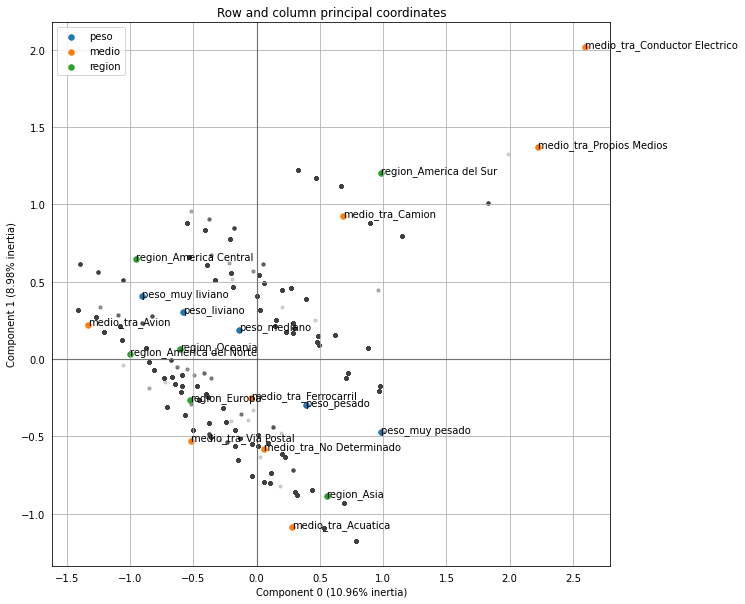

In [ ]:
mca.plot_coordinates(Df_MCA_Plt,
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

#**Kmoda**#

In [ ]:
!pip install kmodes
import numpy as np
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_km = Df_sample[['medio_tra', 'peso', 'region','categoria']].copy()
data_km

,medio_tra,peso,region,categoria
178222,Camion,mediano,America del Sur,Comercio al por mayor y menor excepto autos y ...
348411,Avion,mediano,America del Norte,Otros
244523,Avion,liviano,America del Norte,"Fabricación de vehículos automotores, remolque..."
112983,Camion,muy pesado,Europa,Comercio al por mayor y menor excepto autos y ...
187459,Acuatica,pesado,Asia,Fabricación de otros equipos y productos
...,...,...,...,...
243584,Camion,muy liviano,America del Sur,Fabricación de otros equipos y productos
145639,Camion,muy pesado,America del Sur,Comercio al por mayor y menor excepto autos y ...
305236,Acuatica,pesado,Europa,"Fabricación de vehículos automotores, remolque..."
390370,Acuatica,muy pesado,America del Norte,Elaboración de productos varios


**Gráfico de Rodilla para determinar el k óptimo**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 284426.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 284426.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 284426.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16899, cost: 223040.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12495, cost: 224823.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6327, cost: 227405.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25204, cost: 189342.0
Run 1, iteration: 2/100, moves:

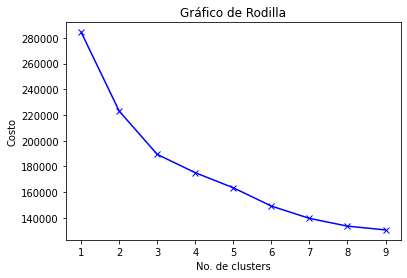

In [ ]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 3, verbose=1, random_state = 3)
    kmodes_cluster_ids = kmode.fit_predict(data_km)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. de clusters')
plt.ylabel('Costo')
plt.title('Gráfico de Rodilla')
plt.show()

**Ajustamos el método al n° de clusters**

In [ ]:
kmodes = KModes(n_jobs = -1, n_clusters = 7, init = 'Huang', random_state = 5)
kmodes.fit_predict(data_km)

array([2, 1, 3, ..., 4, 5, 0], dtype=uint16)

**Determinamos los centroides de los clusters**


In [ ]:
kmodes.cluster_centroids_

array([['Camion', 'muy pesado', 'Asia',
        'Fabricación de vehículos automotores, remolques y semirremolques'],
       ['Avion', 'mediano', 'Europa',
        'Fabricación de otros equipos y productos'],
       ['Camion', 'muy liviano', 'America del Sur',
        'Comercio al por mayor y menor excepto autos y motos'],
       ['Avion', 'muy liviano', 'America del Norte',
        'Comercio al por mayor y menor excepto autos y motos'],
       ['Acuatica', 'liviano', 'Europa',
        'Fabricación de vehículos automotores, remolques y semirremolques'],
       ['Acuatica', 'mediano', 'America del Norte',
        'Comercio al por mayor y menor excepto autos y motos'],
       ['Acuatica', 'pesado', 'Asia',
        'Fabricación de otros equipos y productos']], dtype='<U64')

**Revisamos la iteración de los clusters creados**

In [ ]:
kmodes.n_iter_

2

**Revisamos el costo de los clusters creados**

In [ ]:
kmodes.cost_

144215.0

In [ ]:
data_km['clusters'] = kmodes.labels_
data_km['segmento'] = data_km['clusters'].map({0:'Primer', 1:'Segundo', 2:'Tercer', 3:'Cuarto', 4:'Quinto', 5:'Sexto', 6:'Séptimo'})

In [ ]:
data_km['segmento'] = data_km['segmento'].astype('category')
data_km['segmento'] = data_km['segmento'].cat.reorder_categories(['Primer', 'Segundo', 'Tercer', 'Cuarto', 'Quinto','Sexto','Séptimo'])

**Columnas que forman el centroide**

In [ ]:
list_col = ['clusters', 'segmento']
cols = [col for col in data_km if col not in list_col]
cols

['medio_tra', 'peso', 'region', 'categoria']

**Creamos un índice para la interpretación de los clusters**

In [ ]:
index = ['Primer Cluster', 'Segundo Cluster', 'Tercer Cluster','Cuarto Cluster','Quinto Cluster','Sexto Cluster', 'Séptimo Cluster']

In [ ]:
pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)

,medio_tra,peso,region,categoria
Primer Cluster,Camion,muy pesado,Asia,"Fabricación de vehículos automotores, remolque..."
Segundo Cluster,Avion,mediano,Europa,Fabricación de otros equipos y productos
Tercer Cluster,Camion,muy liviano,America del Sur,Comercio al por mayor y menor excepto autos y ...
Cuarto Cluster,Avion,muy liviano,America del Norte,Comercio al por mayor y menor excepto autos y ...
Quinto Cluster,Acuatica,liviano,Europa,"Fabricación de vehículos automotores, remolque..."
Sexto Cluster,Acuatica,mediano,America del Norte,Comercio al por mayor y menor excepto autos y ...
Séptimo Cluster,Acuatica,pesado,Asia,Fabricación de otros equipos y productos


**Determinamos el número de observaciones comprendidas en cada cluster**

In [ ]:
data_km_freq = data_km.groupby(by="segmento").count()
data_km_freq['FR'] = (data_km_freq['clusters']/data_km_freq['clusters'].sum())*100

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2bc2e1c50>],
      dtype=object)

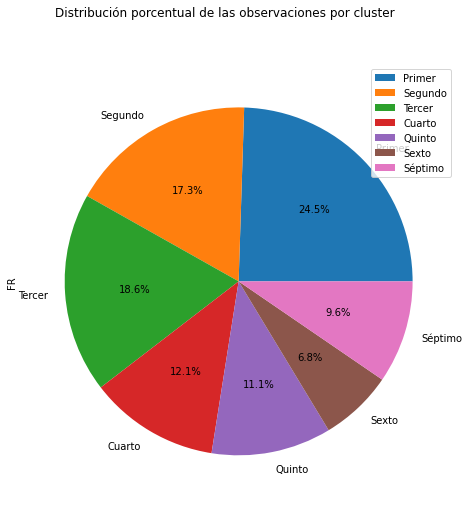

In [ ]:
data_km_freq_plot = data_km_freq[['FR']].copy()
data_km_freq_plot.plot.pie(autopct='%1.1f%%',subplots=True, figsize=(15, 8), title='Distribución porcentual de las observaciones por cluster')